In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.loader import Loader
import seaborn as sns

# Objectives
This notebook aims to describe the basic main data that will be used in Machine Learning tasks NOT Deep Learning task

## Loading ML data

In [2]:
#Load the original data
data = Loader.load_all()["original"]

#Remove the columns that are used in NLP or redundant columns
filtered_columns = [col for col in data.columns if not( ("description" in col) or (col in ["car_id", "_id"]) )]

#Filter also redundant columns
data = data[filtered_columns]

/home/lingfeng/Desktop/repos/Cars_Price_Prediction/utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/utils/loader.py:153: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/utils/loader.py:165: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged

In [3]:
for i in data.columns: print(i)

price
km
year
color
cubicCapacity
brand
model
version
fuelType
bodyTypeId
transmissionTypeId
doors
seatingCapacity
warranty_months
province
environmentalLabel
co2Emissions
co2EmissionsGramsPerKm
trunkCapacityInLiters
maxSpeed
acceleration
hasDetails
jato_classification
traction
brakes
front_suspension
rear_suspension
power_cv
power_kw
rpm_max_power
max_torque_nm
rpm_max_torque
speakers
trip_computer
remote_audio_control_on_steering_wheel
dvd_navigation
antenna
abs
electronic_traction_control
stability_control
curve_braking_control
isofix_system
start_stop_automatic
cubicCapacity_seat_folded
Acabado Exterior_Alerón
Acabado Exterior_Cristales
Acabado Exterior_Faldones
Acabado Exterior_Pintura
Acabado Exterior_Rueda
consumption.urban
consumption.mixed
consumption.extraUrban
dimensions.width
dimensions.height
dimensions.length
AC_Zones
AC_Type
trunk_auto_open
BandaTintada
Calefacción_Trasera
Doble_Cierre
Movil_NFC
Metodo_Apertura
Control_Crucero
Control_Crucero_Adaptativo
SensoresDistancia

# Columns descripptions

## Price distribution analysis

In this plot we can conclude that there is a cleary difference between 2 different class, normal ones and luxury ones.

In [4]:
def hist_plot(arr, n_bins, title = "hist_plot", x_label = "price", y_label="frecuency"):
    plt.figure(figsize=(8, 6))
    sns.histplot(arr, kde=True, bins=n_bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

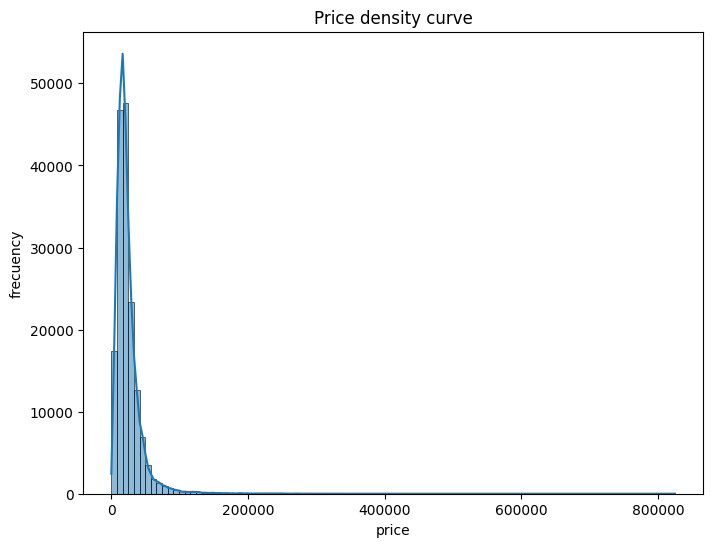

In [5]:
hist_plot(data["price"], n_bins=100, title='Price density curve')

In [6]:
price_data = data["price"]
counts, bin_edges = np.histogram(price_data, bins=100)  # Ajusta los bins según lo necesario

# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})

# Guarda en JSON

hist_data.to_json('data/charts_data.json', orient='records')

In [7]:
def filter_numbers(column:pd.DataFrame, limit: int):
    arr = column.to_numpy()
    smaller = arr[arr < limit]
    bigger = arr[arr >= limit]
    return smaller, bigger

In [8]:
limit = 100000 #This is an arbitrary number just extrated in raw from the previus plot
normal_prices, luxury_prices = filter_numbers(data["price"], limit)

In [9]:

counts, bin_edges = np.histogram(normal_prices, bins=100)  # Ajusta los bins según lo necesario
# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})
hist_data.to_json('data/standard_prices.json', orient='records')


counts, bin_edges = np.histogram(luxury_prices, bins=100)  # Ajusta los bins según lo necesario
# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})
hist_data.to_json('data/luxury_prices.json', orient='records')

Let's plot the distribution of the 2 different class of cars

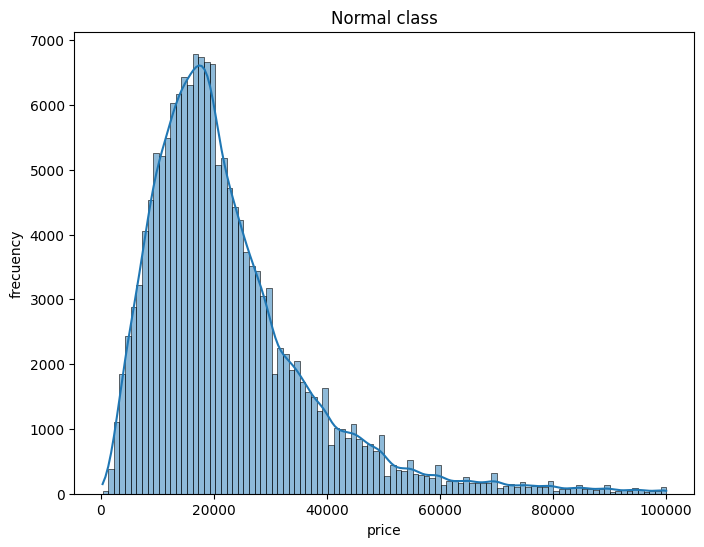

In [10]:
hist_plot(normal_prices, n_bins=100, title='Normal class')

The most expensive cars aren't outliers, they are mostly luxury deportive cars, or edition limited cars of some collection.

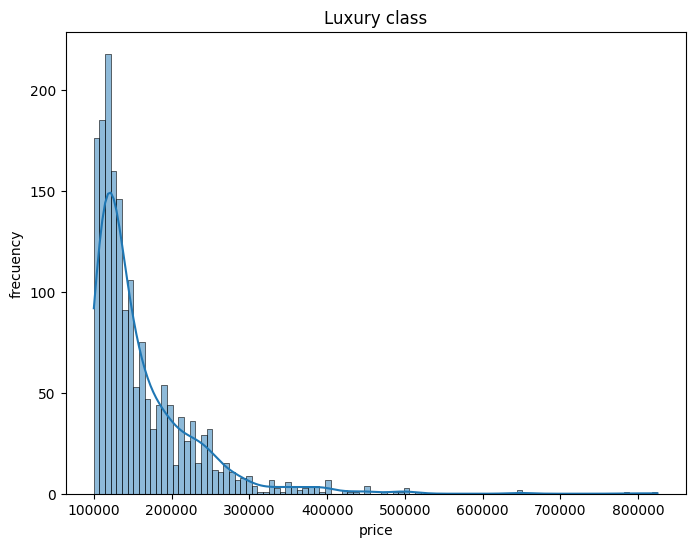

In [11]:
hist_plot(luxury_prices, n_bins=100, title='Luxury class')

## KM Analysis

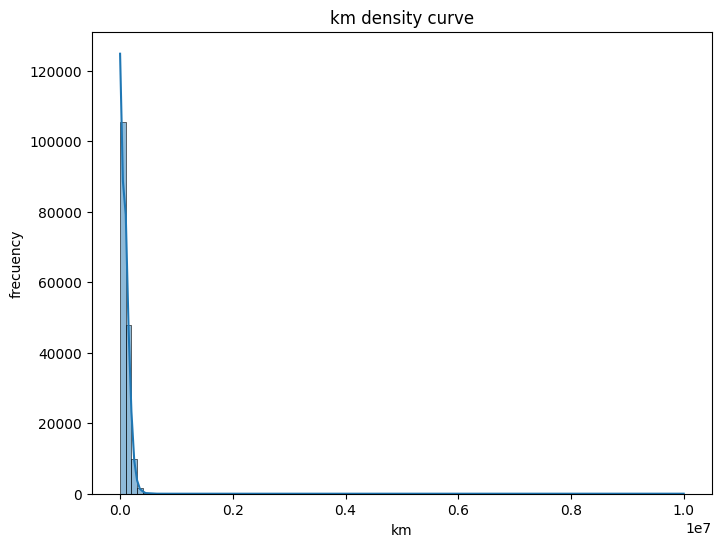

In [12]:
hist_plot(data["km"], n_bins=100, title='km density curve', x_label="km")

In [13]:
km_data = data["km"]
if km_data.isna().any():
    print("Se encontraron valores NaN en km_data. Se eliminarán.")
    km_data = km_data.dropna()  # Elimina los NaN

# Asegúrate de que hay datos suficientes después de eliminar NaN
if km_data.empty:
    raise ValueError("No hay datos suficientes para calcular el histograma después de eliminar NaN.")

# Calcula el histograma
counts, bin_edges = np.histogram(km_data, bins=100)  # Ajusta los bins según lo necesario

# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})

# Guarda en JSON
hist_data.to_json('data/km_data.json', orient='records')

In [14]:
very_used, grandpa_lore = filter_numbers(data["km"], limit=200000)
grandpa_lore

array([223700., 220000., 209000., ..., 395000., 369416., 200000.])

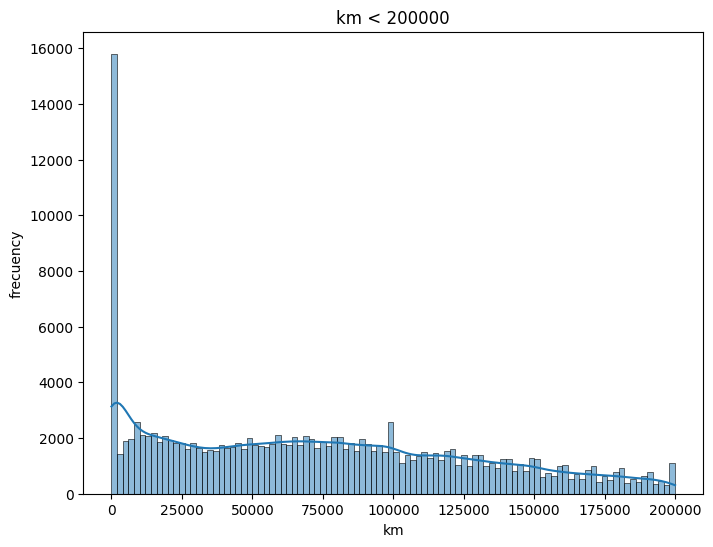

In [15]:
hist_plot(very_used, n_bins=100, title='km < 200000', x_label="km")

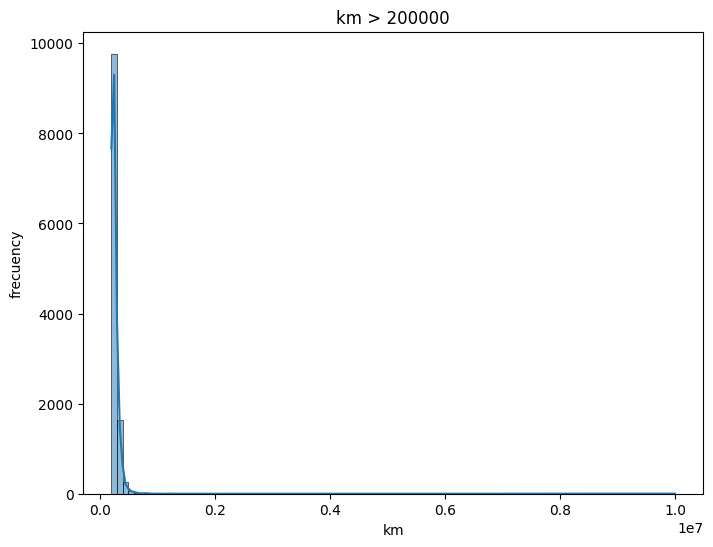

In [16]:
hist_plot(grandpa_lore, n_bins=100, title='km > 200000', x_label="km")

## Price-Km Analysis

In [30]:
def bin_and_plot(x_values, y_values, title, x_label, y_label):
    fig, ax = plt.subplots()
    
    # Cambiar el color de fondo a transparente
    fig.patch.set_alpha(0)
    ax.set_facecolor('none')  # fondo del gráfico transparente
    
    # Cambiar el color de los puntos a verde
    ax.scatter(x=x_values, y=y_values, color='#0174ff')
    
    # Cambiar el color del texto del título y etiquetas a blanco
    ax.set_title(title, color='black')
    ax.set_xlabel(x_label, color='black')
    ax.set_ylabel(y_label, color='black')
    
    # Cambiar color de los ticks y los bordes a blanco
    ax.tick_params(colors='black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    
    # Mostrar la cuadrícula con líneas blancas
    ax.grid(True, color='black')
    
    # Mostrar el gráfico
    plt.show()

In [18]:
normal_class_km = data[data["price"] < limit]["km"]
luxury_class_km = data[data["price"] >= limit]["km"]

In [19]:
#guardar normal_class_km y luxury_class_km en JSON

#eliminar NAN

#normal_class_km = normal_class_km.dropna()
#luxury_class_km = luxury_class_km.dropna()

#print(normal_class_km.shape())
#print(luxury_class_km.shape())

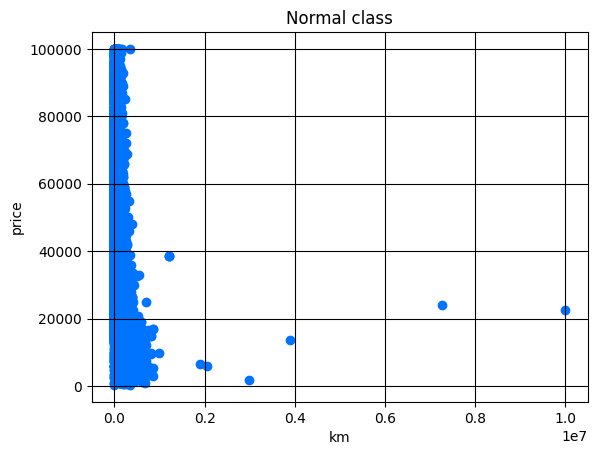

In [31]:
bin_and_plot (normal_class_km, normal_prices, title="Normal class", x_label="km", y_label="price")

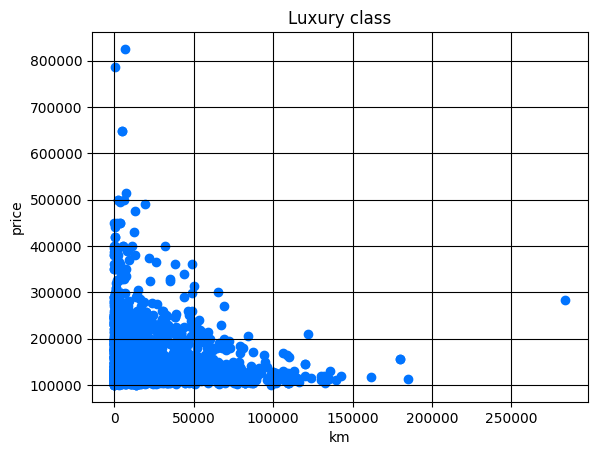

In [32]:
bin_and_plot (luxury_class_km, luxury_prices, title="Luxury class", x_label="km", y_label="price")

## Fueltype Analysys

In [22]:
value_counts = data['fuelType'].value_counts()

In [23]:
import json
#guardar value_counts en JSON
pie_data = [{"label": label, "value": value} for label, value in value_counts.items()]

# Guarda en JSON
with open('data/fuelType_data.json', 'w') as file:
    json.dump(pie_data, file)

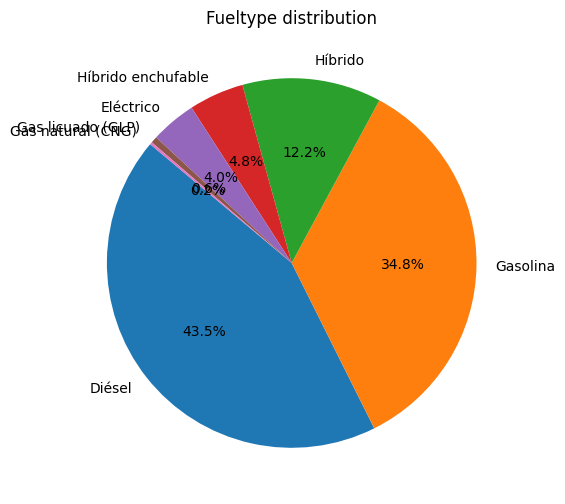

In [24]:

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fueltype distribution')
plt.show()

## Brand Analysys

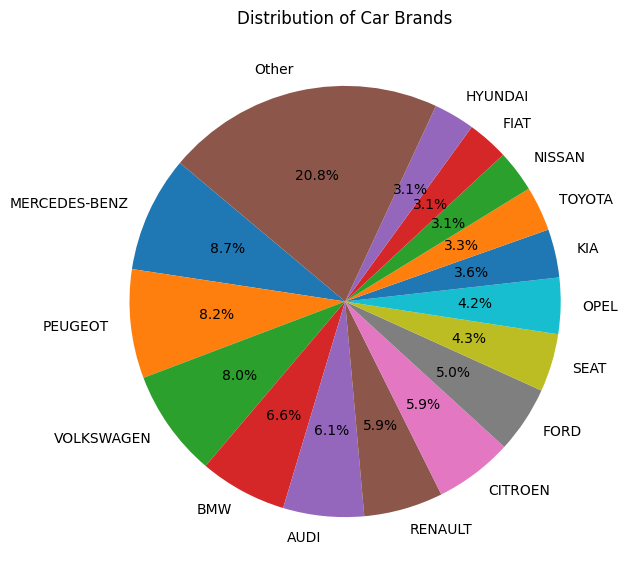

In [35]:
value_counts = data['brand'].value_counts()
# Aggregate all brands with less than 3% into 'Other'
threshold = 0.03 * value_counts.sum()
# Aggregate brands with less than 3% into 'Other' using pandas.concat()
minor_brands = value_counts[value_counts < threshold].sum()
major_brands = value_counts[value_counts >= threshold]
value_counts = pd.concat([major_brands, pd.Series(minor_brands, index=['Other'])])

# Create the improved pie chart
plt.figure(figsize=(10, 7))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Brands')
plt.show()


In [26]:
import json
#guardar value_counts en JSON
pie_data = [{"label": label, "value": value} for label, value in value_counts.items()]

# Guarda en JSON
with open('data/brands_data.json', 'w') as file:
    json.dump(pie_data, file)

In [27]:
modal_prices = data.groupby('brand')['price'].agg(lambda x: x.mode().iloc[0]).reset_index()
modal_prices.columns = ['brand', 'modal_price']

# Ordenar el DataFrame por precio modal de forma descendente y mostrar los resultados
sorted_modal_prices = modal_prices.sort_values(by='modal_price', ascending=False)
print(sorted_modal_prices)

          brand  modal_price
41  LAMBORGHINI       298990
51      MAYBACH       249900
24      FERRARI       225000
6       BENTLEY       109900
32        INEOS        78500
..          ...          ...
20        DODGE         3990
11     CHRYSLER         3900
67        ROVER         2990
16       DAEWOO         2990
17     DAIHATSU         1990

[86 rows x 2 columns]


/tmp/ipykernel_7729/3519342404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modal_prices = data.groupby('brand')['price'].agg(lambda x: x.mode().iloc[0]).reset_index()


In [28]:
# Guardar en JSON

sorted_modal_prices.to_json('data/modal_prices.json', orient='records')


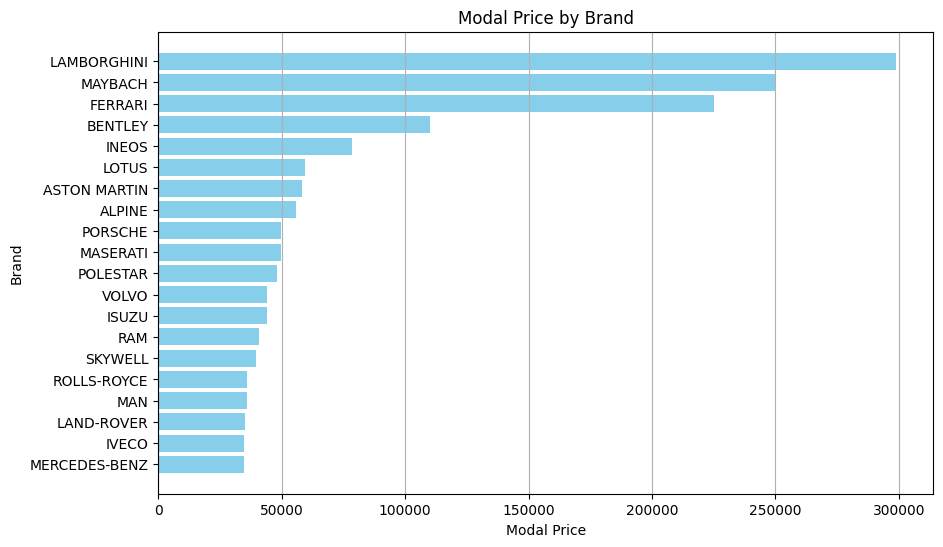

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_modal_prices['brand'][:20], sorted_modal_prices['modal_price'][:20], color='skyblue')
plt.xlabel('Modal Price')
plt.ylabel('Brand')
plt.title('Modal Price by Brand')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x')

# Display the plot
plt.show()

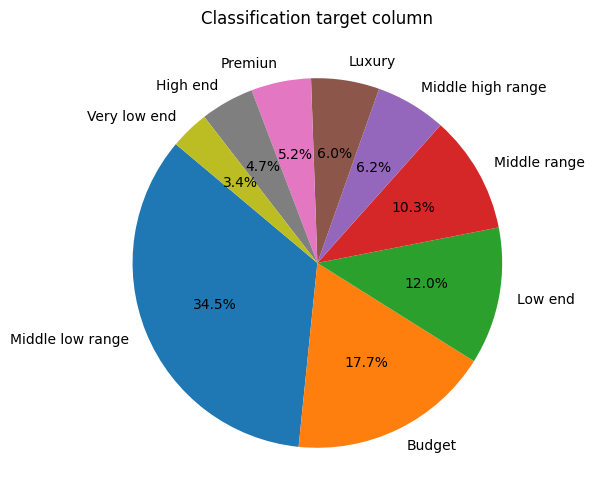

In [38]:
value_counts = data["price_categ"].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Classification target column')
plt.show()